Google Colab’s underlying virtual machine actually includes R by default. However, the default runtime environment is set up for Python. This means you can access R—for example, by using the %%R cell magic provided through rpy2 (which is pre-installed)—or by switching to an R-specific kernel if you prefer running an all-R notebook. For psy-data-tool to work a Python kernel is needed, and rpy2 is used to let Python communicate with R, hence using both the languages and their features in the same notebook.

Check if rpy2 is already in the remote kernel (it should be by default). It is necessary to have it before verifying if R is installed (when running a Python runtime. You don't need this in an R-specific runtime).

In [1]:
# Check rpy2
import rpy2
print(rpy2.__version__)

# load rpy2
%load_ext rpy2.ipython

3.5.17


This allows you to use `%R` or `%%R` magic commands in Python cells. Here you can find the documentation about IPython magics. For example the following should show you the installed R version:


In [2]:
# Check R
%%R
R.version.string

[1] "R version 4.4.2 (2024-10-31)"


Clone the psy-data-tool repository (after resetting previous version if existing):

In [3]:
!rm -rf psy-data-tool
!git clone https://github.com/francesco-gariboldi/psy-data-tool.git

Cloning into 'psy-data-tool'...
remote: Enumerating objects: 164, done.
remote: Counting objects: 100% (164/164), done.
remote: Compressing objects: 100% (113/113), done.
remote: Total 164 (delta 101), reused 106 (delta 51), pack-reused 0 (from 0)
Receiving objects: 100% (164/164), 254.36 KiB | 2.35 MiB/s, done.
Resolving deltas: 100% (101/101), done.


Let's move into the cloned project directory on the remote server:

In [4]:
# Note that !cd doesn’t work for this purpose because the shell where !command
# runs is immediately discarded after executing ‘command’.
%cd psy-data-tool

/content/psy-data-tool


To avoid possible conflicts in the remote machine, we'll create and activate a virtual environment for python packages.

Next, install python packages. Install all packages at once with the following command (using the `requirements.txt` file, already existing within the repository).

_(While `!pip install rpy2` works too, `%pip install rpy2` is often recommended within notebooks because it ensures installation into the environment backing the current IPython kernel.)_

In [5]:
%pip install -r requirements.txt

Now you can check which Python and pip you are using:

In [6]:
!which python
!python --version

!which pip
!pip --version

/usr/local/bin/python
Python 3.11.11
/usr/local/bin/pip
pip 24.1.2 from /usr/local/lib/python3.11/dist-packages/pip (python 3.11)


Usually, Colab will discover the correct `R_HOME` automatically once R is installed. But if you run into issues, you can set it explicitly in Python.

(This path may vary depending on how R was installed, but for most Debian/Ubuntu-based systems, `/usr/lib/R` is correct.)

Let's verify how `R_HOME` is set in the remote system. In IPython, if you want to access a true shell variable, an extra $ is necessary to prevent its expansion by IPython, hence `$$` is used to obtain a system variable.

You can check the R_HOME variables in two ways: `!echo $$R_HOME` or `%env R_HOME`

If it is not automatically well set, then try running the following to manually set it to `/usr/lib/R`:

In [7]:
import os
os.environ['R_HOME'] = '/usr/lib/R'

In [8]:
# Let's check if it has been correctly set
!echo $$R_HOME

/usr/lib/R


In [9]:
%%R
# Get/set the library trees within which packages are looked for.
.libPaths()

[1] "/usr/local/lib/R/site-library" "/usr/lib/R/site-library"      
[3] "/usr/lib/R/library"           


We'll install the R packages in "/usr/lib/R/site-library"

In [10]:
import rpy2.robjects as robjects
import rpy2.robjects.packages as rpackages
from rpy2.robjects.vectors import StrVector
from rpy2.robjects.conversion import localconverter

Install the dependencies needed in a colab environment to install the necessary R packages

In [11]:
!apt-get update
!apt-get install -y \
    libcurl4-openssl-dev \
    libssl-dev \
    libxml2-dev \
    libfontconfig1-dev \
    libfreetype6-dev \
    libharfbuzz-dev \
    libfribidi-dev \
    g++

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Fetched 391 kB in 1s (283 kB/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
R

The following step can take some minutes to complete (R packages installation)
I suggest to run it with "verbose=TRUE" to debug in case of errors.

In [12]:
%%R
install.packages(c('future', 'furrr', 'broom.mixed', 'gglm', 'performance'),
  repos="http://cran.r-project.org",
  type="source",
  verbose=TRUE,
  INSTALL_opts=c("--no-lock", "--no-build-vignettes")
)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
system (cmd0): /usr/lib/R/bin/R CMD INSTALL --no-lock --no-build-vignettes
trying URL 'http://cran.r-project.org/src/contrib/future_1.34.0.tar.gz'
Content type 'application/x-gzip' length 359503 bytes (351 KB)
downloaded 351 KB

trying URL 'http://cran.r-project.org/src/contrib/furrr_0.3.1.tar.gz'
Content type 'application/x-gzip' length 907668 bytes (886 KB)
downloaded 886 KB

trying URL 'http://cran.r-project.org/src/contrib/broom.mixed_0.2.9.6.tar.gz'
Content type 'application/x-gzip' length 5147791 bytes (4.9 MB)
downloaded 4.9 MB

trying URL 'http://cran.r-project.org/src/contrib/gglm_1.0.3.tar.gz'
Content type 'application/x-gzip' length 140821 bytes (137 KB)
downloaded 137 KB

trying URL 'http://cran.r-project.org/src/contrib/performance_0.13.0.tar.gz'
Content type 'application/x-gzip' length 2165084 bytes (2.1 MB)
downloaded 2.1 MB

foundpkgs: future, furrr, broom.mixed, gglm, performance, /tmp/R

In [13]:
%%R
# You can install with verbose output using the optional argument "verbose=TRUE"
# to assess potential problems
install.packages(c('lme4', 'lmerTest', 'emmeans', 'geepack',
                   'performance', 'ggplot2','gglm', 'gridExtra'),
                 lib="/usr/lib/R/site-library", repos="http://cran.r-project.org",
                 verbose=TRUE)

system (cmd0): /usr/lib/R/bin/R CMD INSTALL
trying URL 'http://cran.r-project.org/src/contrib/lme4_1.1-36.tar.gz'
Content type 'application/x-gzip' length 3294834 bytes (3.1 MB)
downloaded 3.1 MB

trying URL 'http://cran.r-project.org/src/contrib/lmerTest_3.1-3.tar.gz'
Content type 'application/x-gzip' length 195633 bytes (191 KB)
downloaded 191 KB

trying URL 'http://cran.r-project.org/src/contrib/emmeans_1.10.7.tar.gz'
Content type 'application/x-gzip' length 1511175 bytes (1.4 MB)
downloaded 1.4 MB

trying URL 'http://cran.r-project.org/src/contrib/geepack_1.3.12.tar.gz'
Content type 'application/x-gzip' length 186359 bytes (181 KB)
downloaded 181 KB

trying URL 'http://cran.r-project.org/src/contrib/performance_0.13.0.tar.gz'
Content type 'application/x-gzip' length 2165084 bytes (2.1 MB)
downloaded 2.1 MB

trying URL 'http://cran.r-project.org/src/contrib/ggplot2_3.5.1.tar.gz'
Content type 'application/x-gzip' length 3604371 bytes (3.4 MB)
downloaded 3.4 MB

trying URL 'http://cra

_(Or from Python, you can import `rpy2.robjects.packages.importr('utils')` and do `utils.install_packages(...)`—whichever workflow you prefer.)_

# Setup completed
Now you can use the actual notebook/code, the `psy-data-tool.ipynb` file content.

To load files in the colab environment you can use different methods. We'll keep things simple here and upload it with the 'drag and drop' method.

Simply drag your files (e.g., data.csv or any executable/data file) into the file browser pane to load it in the colab runtime session environment.

In [14]:
import os

print(os.getcwd())

/content/psy-data-tool


In [15]:
import pandas as pd

# Load your data (usually it is stored in './content/ in the colab environment).
df=pd.read_csv("../world-happiness-report-2021.csv")

# 5. Standardize column names (to lower cased snake_case)
df.columns = df.columns.str.replace('%', '').str.replace('(', '').str.replace(')', '').str.strip().str.lower().str.replace(' ', '_')
df

,country_name,regional_indicator,ladder_score,standard_error_of_ladder_score,upperwhisker,lowerwhisker,logged_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,ladder_score_in_dystopia,explained_by:_log_gdp_per_capita,explained_by:_social_support,explained_by:_healthy_life_expectancy,explained_by:_freedom_to_make_life_choices,explained_by:_generosity,explained_by:_perceptions_of_corruption,dystopia_+_residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [16]:
# Let's look at the data types
df.dtypes

,0
country_name,object
regional_indicator,object
ladder_score,float64
standard_error_of_ladder_score,float64
upperwhisker,float64
lowerwhisker,float64
logged_gdp_per_capita,float64
social_support,float64
healthy_life_expectancy,float64
freedom_to_make_life_choices,float64


Now that you have seen the dataframe, let the `xplore_data`
function do all the hard work:

In [17]:
from re import DEBUG
from xplore_data import xplore_data

# Selected vars must be written in snake_case (for example if var in original
# dataframe is 'Weighted Frequency', you have to use the argument 'weighted_frequency')

# If our sample includes, with respect to a categorical variable, relative values
# to all possible observable levels in the population, if we were to
# fit it into the model, it would be a fixed effect.
# If the identification codes we have in our dataset are only a sample of
# those of the entire population, it* should be entered into the model as a random effect.
# In automatic models generation this is not possible a priori, but we can check the
# models that are chosen at the end of the program.

# In Colab, models will be stored in "/content/psy-data-tool/models.json"

response_var, predictor_vars, best_models, df_r = xplore_data(df, response_var="ladder_score", predictor_vars=["freedom_to_make_life_choices", "healthy_life_expectancy", "regional_indicator"], print_r_warnings=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Render JSON:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]


-----------------------
Original df shape: (149, 20)
Cleaned df shape: (149, 20)
-----------------------

-----------------------
Variable conversion log
-----------------------

regional_indicator: object --> category
ladder_score_in_dystopia: float64 --> category


------------------------------------------------------------------------
Generating and comparing 91 models...
------------------------------------------------------------------------

ladder_score ~ 1

ladder_score ~ freedom_to_make_life_choices

ladder_score ~ healthy_life_expectancy

ladder_score ~ regional_indicator

ladder_score ~ freedom_to_make_life_choices + healthy_life_expectancy

ladder_score ~ freedom_to_make_life_choices + regional_indicator

ladder_score ~ healthy_life_expectancy + regional_indicator

ladder_score ~ freedom_to_make_life_choices + healthy_life_expectancy + regional_indicator

ladder_score ~ freedom_to_make_life_choices:healthy_life_expectancy

ladder_score ~ freedom_to_make_life_choices + hea

Evaluating models:  20%|██        | 2/10 [00:14<00:56,  7.05s/it]WARNING:rpy2.rinterface_lib.callbacks:R[write to console]: Error: number of observations (=149) <= number of random effects (=1386) for term (0 + healthy_life_expectancy + regional_indicator | freedom_to_make_life_choices); the random-effects parameters and the residual variance (or scale parameter) are probably unidentifiable


 

  the conditional random effect variances.
  Solution: Respecify fixed structure! 



Skipping model 'ladder_score ~ 1 + (0 + healthy_life_expectancy + regional_indicator | freedom_to_make_life_choices)' due to an error: Error: number of observations (=149) <= number of random effects (=1386) for term (0 + healthy_life_expectancy + regional_indicator | freedom_to_make_life_choices); the random-effects parameters and the residual variance (or scale parameter) are probably unidentifiable




Evaluating models:  30%|███       | 3/10 [00:21<00:51,  7.36s/it]WARNING:rpy2.rinterface_lib.callbacks:R[write to console]: Error: number of observations (=149) <= number of random effects (=1350) for term (regional_indicator | healthy_life_expectancy); the random-effects parameters and the residual variance (or scale parameter) are probably unidentifiable


 

  the conditional random effect variances.
  Solution: Respecify fixed structure! 

  the conditional random effect variances.
  Solution: Respecify fixed structure! 

  the conditional random effect variances.
  Solution: Respecify fixed structure! 




Skipping model 'ladder_score ~ 1 + (regional_indicator | healthy_life_expectancy)' due to an error: Error: number of observations (=149) <= number of random effects (=1350) for term (regional_indicator | healthy_life_expectancy); the random-effects parameters and the residual variance (or scale parameter) are probably unidentifiable

Skipping model 'ladder_score ~ 1 + (freedom_to_make_life_choices + regional_indicator | healthy_life_expectancy)' due to an error: Error: number of observations (=149) <= number of random effects (=1485) for term (freedom_to_make_life_choices + regional_indicator | healthy_life_expectancy); the random-effects parameters and the residual variance (or scale parameter) are probably unidentifiable



Skipping model 'ladder_score ~ 1 + (0 + freedom_to_make_life_choices + regional_indicator | healthy_life_expectancy)' due to an error: Error: number of observations (=149) <= number of random effects (=1485) for term (0 + freedom_to_make_life_choices + regional_indicator | healthy_life_expectancy); the random-effects parameters and the residual variance (or scale parameter) are probably unidentifiable

Skipping model 'ladder_score ~ healthy_life_expectancy + regional_indicator + (0 + healthy_life_expectancy + regional_indicator | freedom_to_make_life_choices)' due to an error: Error: number of observations (=149) <= number of random effects (=1386) for term (0 + healthy_life_expectancy + regional_indicator | freedom_to_make_life_choices); the random-effects parameters and the residual variance (or scale parameter) are probably unidentifiable



Skipping model 'ladder_score ~ 1 + (0 + regional_indicator | healthy_life_expectancy)' due to an error: Error: number of observations (=149) <= number of random effects (=1350) for term (0 + regional_indicator | healthy_life_expectancy); the random-effects parameters and the residual variance (or scale parameter) are probably unidentifiable



Evaluating models:  40%|████      | 4/10 [00:29<00:44,  7.38s/it]WARNING:rpy2.rinterface_lib.callbacks:R[write to console]: Error: number of observations (=149) <= number of random effects (=1386) for term (healthy_life_expectancy + regional_indicator | freedom_to_make_life_choices); the random-effects parameters and the residual variance (or scale parameter) are probably unidentifiable


 

 



Skipping model 'ladder_score ~ healthy_life_expectancy + regional_indicator + (healthy_life_expectancy + regional_indicator | freedom_to_make_life_choices)' due to an error: Error: number of observations (=149) <= number of random effects (=1386) for term (healthy_life_expectancy + regional_indicator | freedom_to_make_life_choices); the random-effects parameters and the residual variance (or scale parameter) are probably unidentifiable





 

  the conditional random effect variances.
  Solution: Respecify fixed structure! 



Skipping model 'ladder_score ~ freedom_to_make_life_choices + regional_indicator + (0 + freedom_to_make_life_choices + regional_indicator | healthy_life_expectancy)' due to an error: Error: number of observations (=149) <= number of random effects (=1485) for term (0 + freedom_to_make_life_choices + regional_indicator | healthy_life_expectancy); the random-effects parameters and the residual variance (or scale parameter) are probably unidentifiable



Skipping model 'ladder_score ~ freedom_to_make_life_choices + regional_indicator + (0 + regional_indicator | freedom_to_make_life_choices)' due to an error: Error: number of observations (=149) <= number of random effects (=1260) for term (0 + regional_indicator | freedom_to_make_life_choices); the random-effects parameters and the residual variance (or scale parameter) are probably unidentifiable



Evaluating models:  50%|█████     | 5/10 [00:36<00:37,  7.49s/it]WARNING:rpy2.rinterface_lib.callbacks:R[write to console]: Error: number of observations (=149) <= number of random effects (=270) for term (freedom_to_make_life_choices | healthy_life_expectancy); the random-effects parameters and the residual variance (or scale parameter) are probably unidentifiable



Skipping model 'ladder_score ~ 1 + (freedom_to_make_life_choices | healthy_life_expectancy)' due to an error: Error: number of observations (=149) <= number of random effects (=270) for term (freedom_to_make_life_choices | healthy_life_expectancy); the random-effects parameters and the residual variance (or scale parameter) are probably unidentifiable



Skipping model 'ladder_score ~ regional_indicator + (0 + regional_indicator | healthy_life_expectancy)' due to an error: Error: number of observations (=149) <= number of random effects (=1350) for term (0 + regional_indicator | healthy_life_expectancy); the random-effects parameters and the residual variance (or scale parameter) are probably unidentifiable



Skipping model 'ladder_score ~ 1 + (healthy_life_expectancy + regional_indicator | freedom_to_make_life_choices)' due to an error: Error: number of observations (=149) <= number of random effects (=1386) for term (healthy_life_expectancy + regional_indicator | freedom_to_make_life_choices); the random-effects parameters and the residual variance (or scale parameter) are probably unidentifiable



Random effect variances not available. Returned R2 does not account for random effects.




  zero. Your model may suffer from singularity (see `?lme4::isSingular`
  and `?performance::check_singularity`).
  Solution: Respecify random structure! You may also decrease the
  `tolerance` level to enforce the calculation of random effect variances. 



Skipping model 'ladder_score ~ freedom_to_make_life_choices + (freedom_to_make_life_choices | healthy_life_expectancy)' due to an error: Error: number of observations (=149) <= number of random effects (=270) for term (freedom_to_make_life_choices | healthy_life_expectancy); the random-effects parameters and the residual variance (or scale parameter) are probably unidentifiable



Evaluating models:  60%|██████    | 6/10 [00:44<00:29,  7.45s/it]WARNING:rpy2.rinterface_lib.callbacks:R[write to console]: Error: number of observations (=149) <= number of random effects (=1386) for term (0 + healthy_life_expectancy + regional_indicator | freedom_to_make_life_choices); the random-effects parameters and the residual variance (or scale parameter) are probably unidentifiable


  the conditional random effect variances.
  Solution: Respecify fixed structure! 



Skipping model 'ladder_score ~ freedom_to_make_life_choices + healthy_life_expectancy + regional_indicator + (0 + healthy_life_expectancy + regional_indicator | freedom_to_make_life_choices)' due to an error: Error: number of observations (=149) <= number of random effects (=1386) for term (0 + healthy_life_expectancy + regional_indicator | freedom_to_make_life_choices); the random-effects parameters and the residual variance (or scale parameter) are probably unidentifiable



Random effect variances not available. Returned R2 does not account for random effects.


Random effect variances not available. Returned R2 does not account for random effects.


Evaluating models:  70%|███████   | 7/10 [00:52<00:22,  7.54s/it]WARNING:rpy2.rinterface_lib.callbacks:R[write to console]: Error: number of observations (=149) <= number of random effects (=1485) for term (0 + freedom_to_make_life_choices + regional_indicator | healthy_life_expectancy); the random-effects parameters and the residual variance (or scale parameter) are probably unidentifiable


  the conditional random effect variances.
  Solution: Respecify fixed structure! 

  zero. Your model may suffer from singularity (see `?lme4::isSingular`
  and `?performance::check_singularity`).
  Solution: Respecify random structure! You may also decrease the
  `tolerance` level to enforce the calculation of random effect variances. 

  zero. Your model may suffer from singularity (see `?lme4::isSingular`
  and `?performance::check_singularity`).
  Solution: Respecify random structure! You may also decrease the
  `tolerance` level to enforce the calculation of random effect variances. 

  the 

Skipping model 'ladder_score ~ freedom_to_make_life_choices + healthy_life_expectancy + regional_indicator + (0 + freedom_to_make_life_choices + regional_indicator | healthy_life_expectancy)' due to an error: Error: number of observations (=149) <= number of random effects (=1485) for term (0 + freedom_to_make_life_choices + regional_indicator | healthy_life_expectancy); the random-effects parameters and the residual variance (or scale parameter) are probably unidentifiable



Skipping model 'ladder_score ~ healthy_life_expectancy + (healthy_life_expectancy | freedom_to_make_life_choices)' due to an error: Error: number of observations (=149) <= number of random effects (=252) for term (healthy_life_expectancy | freedom_to_make_life_choices); the random-effects parameters and the residual variance (or scale parameter) are probably unidentifiable



Skipping model 'ladder_score ~ 1 + (0 + regional_indicator | freedom_to_make_life_choices)' due to an error: Error: number of observations (=149) <= number of random effects (=1260) for term (0 + regional_indicator | freedom_to_make_life_choices); the random-effects parameters and the residual variance (or scale parameter) are probably unidentifiable

Skipping model 'ladder_score ~ regional_indicator + (regional_indicator | healthy_life_expectancy)' due to an error: Error: number of observations (=149) <= number of random effects (=1350) for term (regional_indicator | healthy_life_expectancy); the random-effects parameters and the residual variance (or scale parameter) are probably unidentifiable




Evaluating models:  80%|████████  | 8/10 [00:59<00:15,  7.56s/it]WARNING:rpy2.rinterface_lib.callbacks:R[write to console]: Error: number of observations (=149) <= number of random effects (=1350) for term (0 + regional_indicator | healthy_life_expectancy); the random-effects parameters and the residual variance (or scale parameter) are probably unidentifiable



Skipping model 'ladder_score ~ 1 + (healthy_life_expectancy | freedom_to_make_life_choices)' due to an error: Error: number of observations (=149) <= number of random effects (=252) for term (healthy_life_expectancy | freedom_to_make_life_choices); the random-effects parameters and the residual variance (or scale parameter) are probably unidentifiable

Skipping model 'ladder_score ~ healthy_life_expectancy + regional_indicator + (0 + regional_indicator | healthy_life_expectancy)' due to an error: Error: number of observations (=149) <= number of random effects (=1350) for term (0 + regional_indicator | healthy_life_expectancy); the random-effects parameters and the residual variance (or scale parameter) are probably unidentifiable



Skipping model 'ladder_score ~ regional_indicator + (regional_indicator | freedom_to_make_life_choices)' due to an error: Error: number of observations (=149) <= number of random effects (=1260) for term (regional_indicator | freedom_to_make_life_choices); the random-effects parameters and the residual variance (or scale parameter) are probably unidentifiable



Random effect variances not available. Returned R2 does not account for random effects.




  zero. Your model may suffer from singularity (see `?lme4::isSingular`
  and `?performance::check_singularity`).
  Solution: Respecify random structure! You may also decrease the
  `tolerance` level to enforce the calculation of random effect variances. 



Skipping model 'ladder_score ~ freedom_to_make_life_choices + regional_indicator + (freedom_to_make_life_choices + regional_indicator | healthy_life_expectancy)' due to an error: Error: number of observations (=149) <= number of random effects (=1485) for term (freedom_to_make_life_choices + regional_indicator | healthy_life_expectancy); the random-effects parameters and the residual variance (or scale parameter) are probably unidentifiable



Skipping model 'ladder_score ~ regional_indicator + (0 + regional_indicator | freedom_to_make_life_choices)' due to an error: Error: number of observations (=149) <= number of random effects (=1260) for term (0 + regional_indicator | freedom_to_make_life_choices); the random-effects parameters and the residual variance (or scale parameter) are probably unidentifiable




Evaluating models:  90%|█████████ | 9/10 [01:07<00:07,  7.56s/it]

Skipping model 'ladder_score ~ 1 + (regional_indicator | freedom_to_make_life_choices)' due to an error: Error: number of observations (=149) <= number of random effects (=1260) for term (regional_indicator | freedom_to_make_life_choices); the random-effects parameters and the residual variance (or scale parameter) are probably unidentifiable



Evaluating models: 100%|██████████| 10/10 [01:07<00:00,  6.80s/it]


Results successfully written to /content/psy-data-tool/models.json
Updated models.json with composite scores at '/content/psy-data-tool/models.json'
Warning message:
Can't compute random effect variances. Some variance components equal
  zero. Your model may suffer from singularity (see `?lme4::isSingular`
  and `?performance::check_singularity`).
  Solution: Respecify random structure! You may also decrease the
  `tolerance` level to enforce the calculation of random effect variances.

Non-mixed best model formula: ladder_score ~ freedom_to_make_life_choices + healthy_life_expectancy + regional_indicator + freedom_to_make_life_choices:healthy_life_expectancy
Mixed best model formula: ladder_score ~ freedom_to_make_life_choices + healthy_life_expectancy + (freedom_to_make_life_choices + healthy_life_expectancy | regional_indicator)


PDF generated successfully: ./rplots.pdf
diagnostics ggplot2 plots generated successfully in                       the working directory in 'rplots.pdf'. Download it to view                       the plots.
Warning message:
Can't compute random effect variances. Some variance components equal
  zero. Your model may suffer from singularity (see `?lme4::isSingular`
  and `?performance::check_singularity`).
  Solution: Respecify random structure! You may also decrease the
  `tolerance` level to enforce the calculation of random effect variances.



------------------------------------------------------------------

Non-mixed best model formula: ladder_score ~ freedom_to_make_life_choices + healthy_life_expectancy + regional_indicator + freedom_to_make_life_choices:healthy_life_expectancy

# Summary 
Call:
lm(formula = non_mixed_best_formula, data = df_r)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.84203 -0.31735  0.05512  0.36814  1.16423 

Coefficients:
                 

You can download the pdf plots from the current working directory.
Trying to implement direct display of plots in Colab (work in progress)

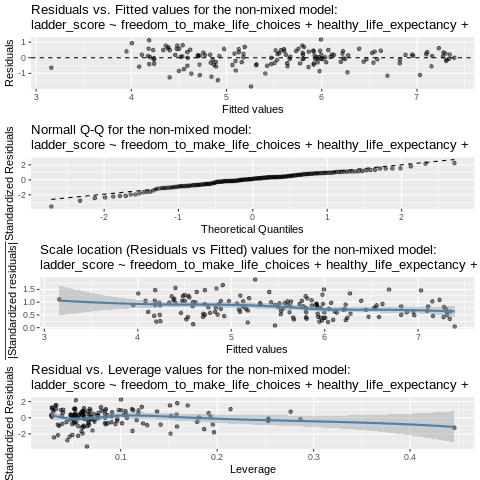

In [18]:
%%R
library(ggplot2)
library(gglm)
library(gridExtra)
plot_list <- list()

non_mixed_best_model <- lm(non_mixed_best_formula, data=df_r)

par(mfrow=c(4,1))

# Residuals vs. Fitted plot directly in Jupyter with gglm()
plot1 <- ggplot(data = non_mixed_best_model) +
            stat_fitted_resid() +
            labs(title = sprintf("Residuals vs. Fitted values for the non-mixed model:\n%s",
                                paste(deparse(formula(non_mixed_best_model)), collapse = "")))


# Normal Q-Q plot
plot2 <- ggplot(data = non_mixed_best_model) +
            stat_normal_qq() +
            labs(title = sprintf("Normall Q-Q for the non-mixed model:\n%s",
                                paste(deparse(formula(non_mixed_best_model)), collapse = "")))


# Scale location diagnostic plot
plot3 <- ggplot(data = non_mixed_best_model) +
                stat_scale_location(
                alpha = 0.5,
                na.rm = TRUE,
                se = TRUE,
                method = "loess",
                color = "steelblue",
                ) +
                labs(title = sprintf("Scale location (Residuals vs Fitted) values for the non-mixed model:\n%s",
                                    paste(deparse(formula(non_mixed_best_model)), collapse = "")))


# Residual vs. leverage plot.
plot4 <- ggplot(data = non_mixed_best_model) +
                stat_resid_leverage(
                alpha = 0.5,
                method = "loess",
                se = TRUE,
                color = "steelblue",
                ) +
                labs(title = sprintf("Residual vs. Leverage values for the non-mixed model:\n%s",
                                    paste(deparse(formula(non_mixed_best_model)), collapse = "")))

# Arrange the plots in a 4x1 grid
grid.arrange(plot1, plot2, plot3, plot4, ncol=1)

In [19]:
%%R
library(ggplot2)
library(gglm)
library(gridExtra)
plot_list <- list()

# Check if the predictor variable is a factor
if (is.factor(r_df${predictor_var})) {
    plot_data_{i} <- data.frame(
        {response_var} = r_df${response_var},
        {predictor_var} = r_df${predictor_var}
    )

    plot{i+1} <- ggplot(plot_data_{i}, aes(x={predictor_var}, y={response_var}, color={predictor_var})) +
                  geom_point(position=position_jitter(width=0.2, height=0), alpha=0.7) +
                  geom_smooth(method="lm", se=FALSE) +
                  labs(title = "Relation between {predictor_var} (Factor) and {response_var}",
                       x = "{predictor_var}",
                       y = "{response_var}") +
                  theme_minimal()

} else {
    plot_data_{i} <- data.frame(
        {response_var} = r_df${response_var},
        {predictor_var} = r_df${predictor_var}
    )

    plot{i+1} <- ggplot(plot_data_{i}, aes(x={predictor_var}, y={response_var}, color={predictor_var})) +
                  geom_point(color="#2f3b86ff") +
                  geom_smooth(method="lm", color="#6327b3ff", fill="#5e9185ff") +
                  labs(title = "Relation between {predictor_var} and {response_var}",
                       x = "{predictor_var}",
                       y = "{response_var}") +
                  theme(panel.background = element_rect(fill = '#e2dfd8ff', colour = '#2f3b86ff'))
}

plot_list[[{i+1}]] <- plot{i+1}
do.call(grid.arrange, c(plot_list, ncol=1))
dev.off()

RParsingError: Parsing status not OK - PARSING_STATUS.PARSE_ERROR